<a href="https://colab.research.google.com/github/SamuelLemosS/IA/blob/GenIA_Enerrgia/C%C3%B3pia_de_genai_finalfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasai==1.4.7
!pip install pandas
!pip install gdown
!gdown 1s_OfQ1fNruAP2Xun-Z1TvQI1I7QbtlZq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 0.9.2
    Uninstalling duckdb-0.9.2:
      Successfully uninstalled duckdb-0.9.2
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver d

Downloading...
From: https://drive.google.com/uc?id=1s_OfQ1fNruAP2Xun-Z1TvQI1I7QbtlZq
To: /content/reclamacoes-n1e2-distribuidoras.csv
100% 883M/883M [00:10<00:00, 82.5MB/s]


In [ ]:
import pandasai
import pandas as pd
from pandasai.llm import AzureOpenAI
from pandasai.llm import OpenAI
from pandasai import SmartDataframe
import openai

llm = AzureOpenAI(
    api_version="2023-05-15",
    deployment_name="gpt-35-turbo",
    api_token="9f21fc3ae81e4a15b3fb40524f4c837a",
    api_base="https://openai-portodigital.openai.azure.com/",
    is_chat_model=True
)

df = pd.read_csv("/content/reclamacoes-n1e2-distribuidoras.csv", sep=";", dtype='unicode', encoding='latin-1')
print(df.head())

sdf = SmartDataframe(df, config={
                    "llm": llm,
                    "enable_cache": False,
                    "verbose": True,
                    }
)


print(df.columns)

  DatGeracaoConjuntoDados DatReferencia SigAgente      NumCPFCNPJ  \
0              2023-11-05    2010-01-01   ENEL RJ  33050071000158   
1              2023-11-05    2010-01-01   ENEL RJ  33050071000158   
2              2023-11-05    2010-01-01   ENEL RJ  33050071000158   
3              2023-11-05    2010-01-01   ENEL RJ  33050071000158   
4              2023-11-05    2010-01-01   ENEL RJ  33050071000158   

  CodMunicipio NomMunicipio SigUF SigRegiao NomClassificacaoAgente  \
0          NaN          NaN    RJ        SE         Concessionária   
1          NaN          NaN    RJ        SE         Concessionária   
2          NaN          NaN    RJ        SE         Concessionária   
3          NaN          NaN    RJ        SE         Concessionária   
4          NaN          NaN    RJ        SE         Concessionária   

  CodTipoReclamacao NomCanalReclamacao  \
0                 1            Nível 1   
1                11            Nível 1   
2                10            Nível 1

In [ ]:

response = sdf.chat("What are the 5 Agencies with the most complaints received by complaint of interruption of supply? Return me on a rank of 1 to 5, your names in text.")
print(response)

The top 5 agencies with the most complaints received by complaint of interruption of supply are: .


In [ ]:
response = sdf.chat("Which agencies have the fewest complaints? Summarize ten of them in a ranked. Return to me only the agency name.")
print(response)

CERAL ARAPOTI
CERAL ANITÁPOLIS
CERIS
COOPERCOCAL
CERAÇÁ
CERGAL
CERNHE
CERES
CERPRO
CERTREL


In [ ]:
response = sdf.chat("What is the most common type of complaint across regions of Brazil? Return in text the answer")
print(response)

The most common type of complaint across regions of Brazil is 'Tarifas / Fatura / Faturamento / Cobrança'.


In [ ]:
response = sdf.chat("Which year had the most complaints?")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 20, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5902, in __getattr__
    return object.__getattribute__(self, name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/accessor.py", line 182, in __get__
    accessor_obj = self._accessor(obj)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/accessors.py", line 512, in __new__
    raise AttributeError("Can only use .dt accessor with datetimelike values")
AttributeError: Can only use .dt accessor with datetimelike values
. Retrying


The year with the most complaints is 2023.


In [ ]:
response = sdf.chat("During this year, what was the place with peak complaints?")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 21, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5902, in __getattr__
    return object.__getattribute__(self, name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/accessor.py", line 182, in __get__
    accessor_obj = self._accessor(obj)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/accessors.py", line 512, in __new__
    raise AttributeError("Can only use .dt accessor with datetimelike values")
AttributeError: Can only use .dt accessor with datetimelike values
. Retrying
ERROR:pandasai.helpers

Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



In [ ]:
response = sdf.chat("What is the most used form of contact by the population to make a complaint? Digital ou telefonico?")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 23, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 2564, in idxmax
    i = self.argmax(axis, skipna, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/base.py", line 655, in argmax
    return nanops.nanargmax(  # type: ignore[return-value]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py", line 88, in _f
    raise TypeError(
TypeError: reduction operation 'argmax' not allowed for this dtype
. Retrying
ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):


Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



In [ ]:
response = sdf.chat("What are the complaints that appear most for months? return in text")
print(response)

The top 10 complaints overall are:
SOLICITAÇÃO DE SERVIÇOS                           208001
Tarifas / Fatura / Faturamento / Cobrança         200622
Outros                                            177578
Interrupção no Fornecimento - Falta de energia    120582
Cadastro / Contratos                              107196
ENCERRAMENTO CONTRATUAL                            90566
Prazos / acompanhamento de solicitação             83311
Rede / Manutenção                                  81069
Qualidade da Prestação do Serviço                  75810
Pagamento                                          73068

The top complaint by month are:
In month 1, the top complaint is SOLICITAÇÃO DE SERVIÇOS.
In month 2, the top complaint is Tarifas / Fatura / Faturamento / Cobrança.
In month 3, the top complaint is SOLICITAÇÃO DE SERVIÇOS.
In month 4, the top complaint is SOLICITAÇÃO DE SERVIÇOS.
In month 5, the top complaint is SOLICITAÇÃO DE SERVIÇOS.
In month 6, the top complaint is SOLICITAÇÃO DE SERVIÇ

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 22, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

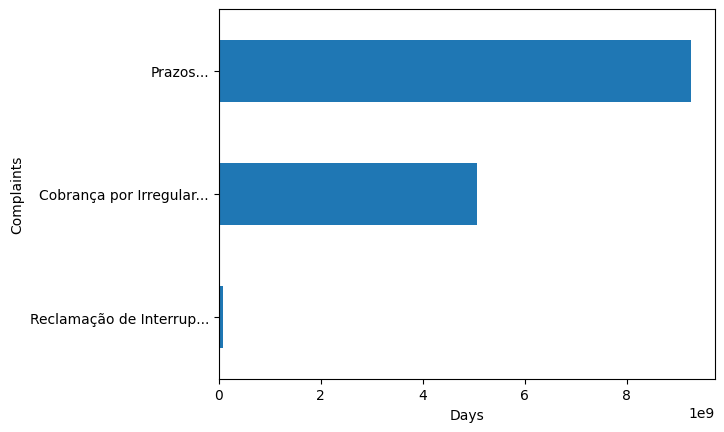

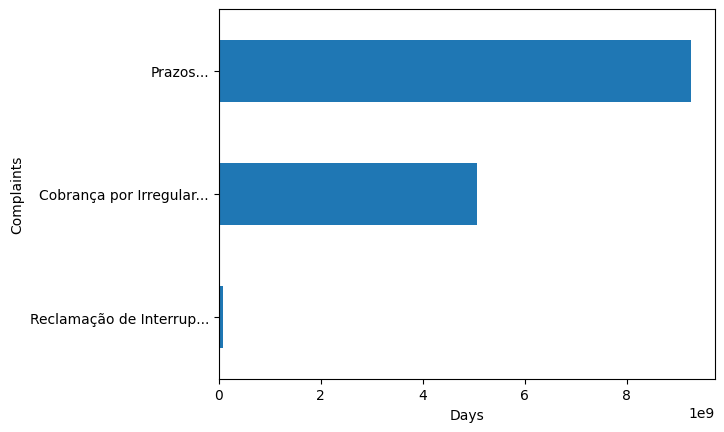

None


In [ ]:
response = sdf.chat("What are the complaints with the longest waiting time to be corrected?")
print(response)

In [ ]:
response = sdf.chat("What are the complaints with the longest waiting time to be corrected? return in text")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 22, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

The top 10 complaints with the longest waiting time to be corrected are:
- Outros (Conexão): 843437 days
- Iluminação Pública: 357814 days
- Outros (Conexão): 315658 days
- Danos Elétricos: 300067 days
- Suspensão indevida: 268044 days
- Suspensão indevida: 232955 days
- Outros (Conexão): 195841 days
- Outros (Conexão): 183119 days
- Danos Elétricos: 179981 days
- Iluminação Pública: 171121 days



In [ ]:
response = sdf.chat("Communication can be a means of problem solving?")
print(response)

Yes, communication can be a means of problem solving.


In [ ]:
response = sdf.chat("Quais problemas a comunicação pode resolver?")
print(response)

The communication can solve problems related to misunderstandings, lack of information, and misinterpretation of data. By improving communication, it is possible to avoid errors, reduce conflicts, and increase productivity. In the context of the provided dataframes, communication can help to identify the main types of complaints and the channels used by customers to make them, which can guide the company's actions to improve customer service.


In [ ]:
response = sdf.chat("What are the months with the least complaints and in which regions in the year 2023")
print(response)

The months with the least complaints in CO in 2023 are 10.


In [ ]:
response = sdf.chat("Which would be alternatives to reduce complaints?")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/ops/array_ops.py", line 165, in _na_arithmetic_op
    result = func(left, right)
TypeError: unsupported operand type(s) for /: 'str' and 'str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 21, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/ops/common.py", line 72, in new_method
    return method(self, other)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py", line 126, in __truediv__
    return self._arith_me

Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



In [ ]:
response = sdf.chat("Quais problemas a comunicação pode resolver? e retirando esse problemas qual o total NumPrazoMedioSolucao em comparação a se tivesse esse problema")
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 1791, in array_func
    result = self.grouper._cython_operation(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/ops.py", line 1039, in _cython_operation
    return cy_op.cython_operation(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/ops.py", line 708, in cython_operation
    return self._cython_op_ndim_compat(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/ops.py", line 512, in _cython_op_ndim_compat
    res = self._call_cython_op(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/ops.py", line 571, in _call_cython_op
    func = self._get_cython_function(self.kind, self.how, values.dtype, is_numeric)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/ops.py", line 192, in _get_cython_function
    raise NotImplementedErro

Unfortunately, I was not able to answer your question, because of the following error:

This model's maximum context length is 8192 tokens. However, your messages resulted in 204662 tokens. Please reduce the length of the messages.

